# Problem 0: Other activation functions (10%)

### The leaky Relu is defined as $max(0.1x, x)$.
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?

1)The derivative of the leaky ReLU function can be expressed as:

   f′(x)=0.1x if x＜0

   f′(x)=x if x＞0

2)Yes, leaky ReLU is suitable for backpropagation. Its derivative is simple and computationally efficient, allowing for effective gradient flow 
during training, especially in deep networks where traditional ReLU might fail due to the dying ReLU issue.

### $tanh$ is defined as $\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?
 - How is it different from the sigmoid activation
 - What is an example of when to use it? When should you not use it?

1)The derivative of the tanh function can be derived and simplified to:
 
   f′(x)=1−tanh^2(x)

2)Yes, the tanh function is suitable for backpropagation. Its derivative is straightforward to compute, and the function itself is differentiable everywhere, which is crucial for gradient-based optimization methods.

3)Difference from Sigmoid Activation:
Range: The tanh function outputs values between -1 and 1, making it zero-centered. In contrast, the sigmoid function outputs values between 0 and 1.
Gradient: Tanh has a stronger gradient for most inputs compared to the sigmoid function, which can be beneficial for learning but also makes it more prone to the vanishing gradient problem in very deep networks.

4)Use tanh in hidden layers of neural networks where you need a non-linear activation function that is zero-centered, which can help in stabilizing the learning process.
Avoid using tanh in very deep networks or when dealing with problems where the vanishing gradient problem might be a significant issue. In such cases, ReLU or its variants (like leaky ReLU) might be more appropriate. Additionally, for binary classification problems where the output needs to be interpreted as a probability, the sigmoid function is typically preferred.

# Problem 1: The Deep Learning Recipe (40%)

In this problem, we'll follow the "deep learning recipe" covered in class on the IMDB data.

In [12]:
import numpy as np
import pandas as pd
import glob
import os
%pylab inline
np.random.seed(1234)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Step 0: load the data

In [47]:
import sys
sys.path.insert(0, ".")
from sklearn.datasets import load_files

def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    """Provided helper function to load data"""
    train_dir = os.path.join("D:/data/aclImdb/", "train")
    test_dir = os.path.join("D:/data/aclImdb/", "test")

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ("pos", "neg"):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, "*.txt"))
        for filename in files:
            with open(filename, encoding="utf-8") as fi:
                text = fi.read()
            target = label == "pos"
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)

    texts = []
    targets = []
    for label in ("pos", "neg"):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, "*.txt"))
        for filename in files:
            with open(filename, encoding="utf-8") as fi:
                text = fi.read()
            target = label == "pos"
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]

    return (train_docs, y_train), (test_docs, y_test)

# or copy the loading function from the notes

In [48]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text("D:/data/aclImdb/")
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


Steps 
 - be one with data
 - set up e2e harness + get dumb baselines
 - overfit
 - regualarize
 - tune
 - squeeze

### Step 1: be one with the data
 - make some histograms
 - calculate some summary statistics
 - read a bunch of training examples and discuss any oddities you find
 - finally, turn the data into count vectors

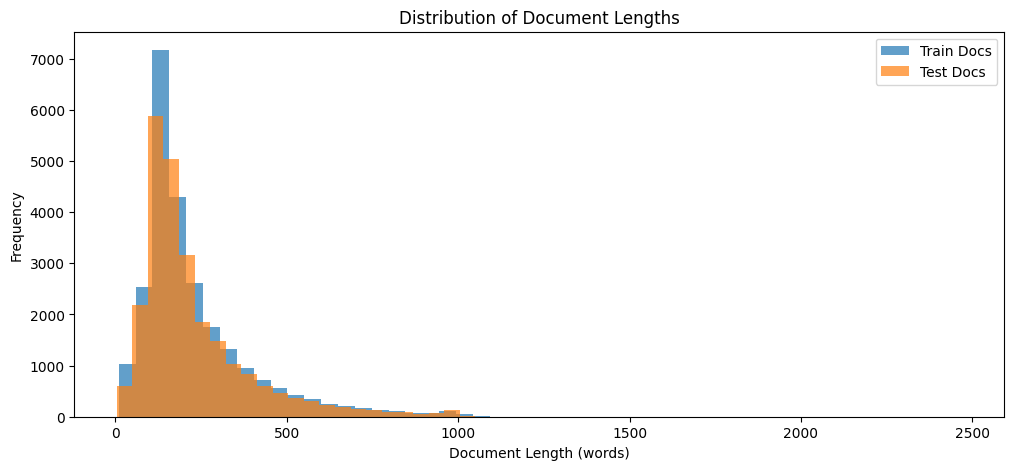

Average train document length: 233.7872 words
Average test document length: 228.52668 words
Number of training samples: 25000
Number of test samples: 25000
Positive labels in train set: 12500
Negative labels in train set: 12500
Positive labels in test set: 12500
Negative labels in test set: 12500


In [50]:
# your code here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Document lengths
train_doc_lengths = [len(doc.split()) for doc in train_docs]
test_doc_lengths = [len(doc.split()) for doc in test_docs]

# Plot histograms of document lengths
plt.figure(figsize=(12, 5))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train Docs')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test Docs')
plt.xlabel('Document Length (words)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Document Lengths')
plt.show()

# Calculate summary statistics
print(f"Average train document length: {np.mean(train_doc_lengths)} words")
print(f"Average test document length: {np.mean(test_doc_lengths)} words")
print(f"Number of training samples: {len(train_docs)}")
print(f"Number of test samples: {len(test_docs)}")
print(f"Positive labels in train set: {np.sum(y_train)}")
print(f"Negative labels in train set: {len(y_train) - np.sum(y_train)}")
print(f"Positive labels in test set: {np.sum(y_test)}")
print(f"Negative labels in test set: {len(y_test) - np.sum(y_test)}")

# make some plots, calculate some summary stats

In [51]:
# your code here
# print out some documents, find some anomalies
# Display a few training documents to observe the text structure
for i in range(5):
    print(f"\nDocument {i+1} (Label: {'Positive' if y_train[i] else 'Negative'}):\n")
    print(train_docs[i][:500])  # Print first 500 characters of the document for readability
    print("\n" + "-"*80)



Document 1 (Label: Positive):

Wrestlemania 14 is not often looked as one of the great Wrestlemania's but I would personally put it, in my top 5, if not the top 3. It has so many great things, and it truly signified the birth of The Attitude Era, which was WWE's best era, in my opinion. HBK has the heart of a lion, and him putting over Austin like he did, on his way out, was pure class on his part. It has one of the hottest crowds you will ever see, and it has J.R and The King at their announcing best!. <br /><br />Matches.<b

--------------------------------------------------------------------------------

Document 2 (Label: Negative):

OK, the movie is good but I give it a 1 because the idea of a computer virus becoming an organic virus is pure fairy tale. This kind of crap just adds to those uncomputer savvy moron's paranoid delusions that a computer virus is exactly like an organic virus. First of all, strings of code and dozens of 1s and 0s add up to computer virus. An organic vi

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features=50000, lowercase=True)

# Fit the vectorizer on the training data and transform both train and test data
x_train = vec.fit_transform(train_docs)
x_test = vec.transform(test_docs)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
# vec.fit(...
# x_train = ...
# x_test = ...

x_train shape: (25000, 50000)
x_test shape: (25000, 50000)


## Step 2: set up test harness and get baselines
 - state your baseline models and calculate the log loss and accuracy
   - what is the best constant guess?
   - what about a rules-based model? (e.g. checking if one of a few known words is present)
 - make a function that calculates model performance on the test set
   - `def eval_model(your_model):`
 - make a keras model
   - try to initialize the last layer appropriately (see [here](https://keras.io/api/layers/initializers/))
     - `bias_initializer=Constant(some_constant)`
   - evaluate the model with your function BEFORE training
 - examine data exactly as it is presented to the network
 - make sure you can memorize a batch

In [53]:
from sklearn.metrics import log_loss, accuracy_score


In [55]:
# Step 1: Baseline Models and Performance Metrics
# calculate the accuracy and log loss for a constant guess
# calculate the accuracy and log loss for a rules based approach


# Constant Guess Model - always predicts the most frequent class (for example, "positive" if balanced)
constant_guess = np.ones(len(y_test))  # Assume "positive" as a constant guess
constant_accuracy = accuracy_score(y_test, constant_guess)
constant_log_loss = log_loss(y_test, constant_guess * 0.5)  # Multiply by 0.5 to simulate balanced prediction

print(f"Constant Guess - Accuracy: {constant_accuracy:.4f}, Log Loss: {constant_log_loss:.4f}")

# Rules-Based Model - predict positive if certain words are present
positive_words = ["great", "excellent", "amazing", "good", "wonderful"]

def rules_based_predict(documents):
    predictions = []
    for doc in documents:
        if any(word in doc for word in positive_words):
            predictions.append(1)  # Positive sentiment
        else:
            predictions.append(0)  # Negative sentiment
    return np.array(predictions)

rules_based_predictions = rules_based_predict(test_docs)
rules_based_accuracy = accuracy_score(y_test, rules_based_predictions)
rules_based_log_loss = log_loss(y_test, rules_based_predictions * 0.5)

print(f"Rules-Based Model - Accuracy: {rules_based_accuracy:.4f}, Log Loss: {rules_based_log_loss:.4f}")


Constant Guess - Accuracy: 0.5000, Log Loss: 0.6931
Rules-Based Model - Accuracy: 0.5000, Log Loss: 0.6931


In [67]:
# Step 2: Model Evaluation Function
# Define a function to evaluate the model’s performance on accuracy and log loss.
from keras.models import Sequential
from keras.layers import Dense, Input

input_shape = x_train.shape[1]  # 特征数量

# Create a simple neural network model
model = Sequential([
    Input(shape=(input_shape,)),  # Input layer using the feature dimension
    Dense(64, activation='relu'),   # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model using the evaluation function defined earlier
test_accuracy, test_log_loss = eval_model(model)
print(f"Test Accuracy: {test_accuracy}, Test Log Loss: {test_log_loss}")


Model - Accuracy: 0.4994, Log Loss: 7.9808
Test Accuracy: 0.4994, Test Log Loss: 7.980758067064219


In [69]:
#Step 3: Build the Neural Network with Keras

from keras.initializers import Constant
from keras.optimizers import Adam

# Prepare count vectorizer features
vec = CountVectorizer(max_features=5000, lowercase=True)
x_train = vec.fit_transform(train_docs).toarray()
x_test = vec.transform(test_docs).toarray()

# Neural network architecture
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid', bias_initializer=Constant(0.5))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model before training
print("Evaluating model before training:")
eval_model(model)


    # your code here
    # print or return the accuracy and log loss on the test data

D:\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluating model before training:
Model - Accuracy: 0.4999, Log Loss: 7.9725


(0.49992, 7.97246802684671)

In [70]:
# some other keras imports
import keras.backend as K
from keras.initializers import Constant # for last layer initialization

hint: what value of X do I need for $\sigma(x)$ to be 0.5

In [71]:
# make a model
# inpt = Input(shape=...)
# hidden = ... (inpt)
# hidden = ...(hidden)
# ...
# model = ...
# model.compile... # don't forget to compile it

In [72]:
# evaluate the model before training it
eval_model(model)

Model - Accuracy: 0.4999, Log Loss: 7.9725


(0.49992, 7.97246802684671)

In [73]:
# examine data as it is presented to the network

In [75]:
# your code here
# print out a few training examples
# they should be vectors of counts.
# turn them back into words
# Display the first few training examples as vectors of counts
# Step 4: Examine Training Data as Presented to the Network
print("Sample training data in vector form:")
print(x_train[:5])

# Convert these vectors back to words to confirm the vectorization is correct
print("\nConverting vectors back to words:")
for i in range(5):
    words = [vec.get_feature_names_out()[idx] for idx, count in enumerate(x_train[i]) if count > 0]
    print(f"Document {i+1} words: {words}")


Sample training data in vector form:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Converting vectors back to words:
Document 1 words: ['10', '14', '15', '16', '1st', '20', '3rd', 'actually', 'after', 'age', 'all', 'almost', 'amazing', 'among', 'and', 'another', 'antics', 'anybody', 'ape', 'are', 'as', 'at', 'attitude', 'average', 'away', 'awesome', 'back', 'bad', 'battle', 'be', 'because', 'been', 'before', 'best', 'better', 'big', 'biggest', 'birth', 'bits', 'bottom', 'br', 'breath', 'but', 'by', 'can', 'championship', 'class', 'constant', 'crowd', 'dead', 'decision', 'defeat', 'definitely', 'did', 'driver', 'eating', 'end', 'ending', 'entertaining', 'era', 'european', 'even', 'events', 'ever', 'every', 'everything', 'exciting', 'fan', 'fast', 'favorites', 'finally', 'flying', 'for', 'from', 'gets', 'gives', 'go', 'goes', 'going', 'gonna', 'good', 'great', 'greatest', 'guest', 'had', 'hardcore', 'hart', 'has', 'have', 'he', 'heard', 

In [76]:
# Step 5: Ensure Model Can Memorize a Small Batch
# try the first 100 training examples
# the loss should go to near 0 pretty quickly
#model.fit(...)

# Fit the model on a small batch of data
print("Training on a small batch to ensure memorization:")
model.fit(x_train[:100], y_train[:100], epochs=20, batch_size=16, verbose=1)

# Evaluate the model on the same batch to confirm it has memorized it
eval_model(model)


Training on a small batch to ensure memorization:
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3375 - loss: 0.8096
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 0.6569 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8351 - loss: 0.5968
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8975 - loss: 0.5248
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.4857
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9474 - loss: 0.4382
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.3749
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3433
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3086
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2716
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2554
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

(0.57028, 6.85076181587773)

In [77]:
# at this point, the model is probably over fit

## Part 3:  Overfit
 - make the network large, and convince yourself you can overfit the data

In [79]:
# your code here
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Check the input shape from the training data
input_shape = x_train.shape[1]  # Number of features in x_train

# Define a larger model to encourage overfitting
model = Sequential()
model.add(Input(shape=(input_shape,)))  # Specify the input shape here

# Add multiple layers with a large number of neurons
model.add(Dense(512, activation='relu'))  # First hidden layer with 512 neurons
model.add(Dense(256, activation='relu'))  # Second hidden layer with 256 neurons
model.add(Dense(128, activation='relu'))  # Third hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))   # Fourth hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))   # Fifth hidden layer with 32 neurons

# Output layer with 1 neuron for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Overfit the model on a small subset of training data (e.g., the first 100 samples)
x_train_subset = x_train[:100]
y_train_subset = y_train[:100]

# Train the model on this subset and monitor the training loss
history = model.fit(x_train_subset, y_train_subset, epochs=100, batch_size=10, verbose=1)

# Evaluate the model to see the training vs test performance
train_loss, train_accuracy = model.evaluate(x_train_subset, y_train_subset, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4855 - loss: 0.7124
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7480 - loss: 0.4993
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1385
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0227
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 3.3052e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 1.5921e-04
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 6.2162e-05
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 3.6857e-05
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.5819e-05
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 5.6795e-05
Epoch 12/100
10/10 ━━━━━━━━━━━━━

In [ ]:
# fit the model

## Part 4: Regularize
 - use regularizers, dropout, network size, etc

In [81]:
from keras.regularizers import l2
from keras.layers import Dropout

In [82]:
# model code here
# just like you did in the previous part
# add dropout, regularization, maybe remove a Dense layer

# Set input shape based on feature count in x_train
input_shape = x_train.shape[1]

# Define a neural network model with regularization
model = Sequential()
model.add(Input(shape=(input_shape,)))

# Add hidden layers with L2 regularization and Dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))  # First layer with L2 regularization
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  # Second layer with L2 regularization
model.add(Dropout(0.5))  # Dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))   # Third layer with L2 regularization
model.add(Dropout(0.3))  # Dropout

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the full training set and monitor validation loss
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7252 - loss: 1.1159 - val_accuracy: 0.8610 - val_loss: 0.6522
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8793 - loss: 0.5910 - val_accuracy: 0.8564 - val_loss: 0.5866
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8891 - loss: 0.5261 - val_accuracy: 0.8724 - val_loss: 0.5393
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8965 - loss: 0.4856 - val_accuracy: 0.8718 - val_loss: 0.5441
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9077 - loss: 0.4674 - val_accuracy: 0.8698 - val_loss: 0.5323
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9138 - loss: 0.4449 - val_accuracy: 0.8706 - val_loss: 0.5313
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9085 - loss: 0.4487 - val_accuracy: 0.8718 - val_loss: 0.5244
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9121 - loss: 0.4377 - val_accu

In [83]:
# fit the model

## Part 5 - 6: Tune and Squeeze
It will take a long time to tune the number of units in the Dense layers, so we will skip the tune phase. 

### Todo
 - Retrain the model
 - Make sure let it train enough
 - use callbacks to make sure the network stops before overfitting too much 
 - use callbacks to reduce the learning rate appropriately. 

In [84]:
# model code here

In [92]:
# add these callbacks just like we did in class

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import RMSprop


# Define input shape based on x_train's feature count
input_shape = x_train.shape[1]

# Define the neural network model with more units and adjusted regularization
model = Sequential([
    Input(shape=(input_shape,)),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)),  # Increased units, reduced L2 regularization
    Dropout(0.3),  # Reduced dropout rate for first layer
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model with a reduced learning rate and RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

# Train the model with the modified parameters
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_accuracy, test_log_loss = eval_model(model)
print(f"Test Accuracy: {test_accuracy}, Test Log Loss: {test_log_loss}")

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7644 - loss: 1.4591 - val_accuracy: 0.8323 - val_loss: 0.7232 - learning_rate: 5.0000e-04
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.8849 - loss: 0.5344 - val_accuracy: 0.8772 - val_loss: 0.4296 - learning_rate: 5.0000e-04
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9011 - loss: 0.3791 - val_accuracy: 0.8816 - val_loss: 0.3820 - learning_rate: 5.0000e-04
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9069 - loss: 0.3334 - val_accuracy: 0.8824 - val_loss: 0.3744 - learning_rate: 5.0000e-04
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9148 - loss: 0.3030 - val_accuracy: 0.8747 - val_loss: 0.3894 - learning_rate: 5.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9210 - loss: 0.2913 - val_accuracy: 0.8767 - val_loss: 0.3939 - learning_rate: 5.0000e-04
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 2

In [ ]:
# fit the model

In [ ]:
# you should be able to get > 88% accuracy

# Problem 2: Transfer Learning (30 %)
In this problem we will explore a technique called transfer learning. Often, we don't have very much labeled data for the problem at hand (we call it __data-poor__), but we can find labeled data for a similar problem (which we call ___data-rich__). 

In transfer learning, we use the __data-rich problem__ to train an network with good performance. We then make a similar network for the __data-poor problem__ but use the weights learned from the first problem in this network. This greatly reduces the amount of data needed to train the data-poor problem. You can think of this as reducing the number of free parameters. 

Here, we will use the mnist digit recognition problem. We will pretend that we are interested in telling the difference between the digits `4` and `9`, but we only have 10 labeled examples. We will pretend that we have tons of labeled examples of all of the other digits. 

In [ ]:
import numpy as np
import pandas as pd
%pylab inline

In [ ]:
# add some imports

np.random.seed(1234)

# $ \\ $

## Part 0: Subset the data into two datasets
 1. One part will have `x_train_49`, `y_train_49`, etc. which has only `4`s and `9`s. 
 2. The second part will have variables `x_train_rest` etc, which will have the rest of the data and none of the digits `4` and `9`. 

In [ ]:
from keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    mask = (y == 9) | (y == 4)
    new_x = x[mask]
    new_y = (y[mask] == 4).astype('int64')
    return new_x, new_y

def subset_to_rest(x, y):  # this is a new function
    mask = ~((y == 9) | (y == 4))
    new_x = x[mask]
    new_y = y[mask]
    return new_x, new_y


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

train_frac = 0.8
cutoff = int(x_train.shape[0] * train_frac)
x_train, x_val = x_train[:cutoff], x_train[cutoff:]
y_train, y_val = y_train[:cutoff], y_train[cutoff:]
y_train_ohe, y_val_ohe = y_train_ohe[:cutoff], y_train_ohe[cutoff:]

x_train_49, y_train_49 = subset_to_9_and_4(x_train, y_train)
x_val_49, y_val_49 = subset_to_9_and_4(x_val, y_val)
x_test_49, y_test_49 = subset_to_9_and_4(x_test, y_test)

print(x_train_49.shape)

x_train_rest, y_train_rest = subset_to_rest(x_train, y_train)
x_test_rest, y_test_rest = subset_to_rest(x_test, y_test)

y_train_rest_ohe = to_categorical(y_train_rest, num_classes)
y_test_rest_ohe = to_categorical(y_test_rest, num_classes)



# $ \\ $
## Now we will throw away most of the training data for the 4-9 problem
 - we will keep only 10 points

In [ ]:
num_points = 10
x_train_49, y_train_49 = x_train_49[:num_points], y_train_49[:num_points]


# $ \\ $

## Part 1: Build a neural network to fit the `rest` data.
 - ### Include 2 densely connected hidden layers with 256 neurons each.
 - The output dimension should be either 8 or 10, depending on how you do the problem
 - ### Compute the accuracy score for this model

# $ \\ $

In [ ]:
K.clear_session()
num_hidden_units = 256

In [ ]:
digit_input = Input(shape=(x_train_rest.shape[1],), name='digit_input')
# add code here
#model_rest = ...
#model_rest.compile( ... # to be removed


### Fit the model for 10 epochs and compute the accuracy score

In [ ]:
#model_rest.fit(...

In [ ]:
#accuracy_score(...

# $ \\ $ 
## Part 2: Fit a model on the `4`-`9` data
 - ### Use the same 2 densely-connected layers with 256 hidden units
 - ### Here the output layer could have 1 or two units, depending on how you set up the problem
 - ### NB: DO NOT use `K.clear_session()` because we need stuff for later. 

In [ ]:

digit_input_49 = Input(shape=(x_train_49.shape[1],), name='digit_input')
# add code here
#model49 = Model(...
model49.compile( ...


In [ ]:
#model49.fit( ... (NB try epochs=1000)


In [ ]:
# accuracy_score...
# f1_score...

# $ \\ $ 
## Part 3: Transfer Learning:
 - ### Make an identical model to part 2, but take the weights learned from the original model on the rest of the data.
 - ### NB: the `Dense` layer takes a `weights=` keyword argument
 - ### Try making the layers static or trainable.


In [ ]:
digit_input_transfer = Input(shape=(x_train_49.shape[1],), name='digit_input')
# add code here
#model_transfer = Model(...
#model_transfer.compile(...


In [ ]:
# model_transfer.fit(...    epochs=100, 
# accuracy_score...
# f1_score...

## Part 4: Analysis:
 - We only transferred the first two layers and not the last one. Why?
 - Write the answer in a markdown cell

# Problem 4: Data Augmentation (20%)
Another way to prevent overfitting is to augment the data.
More data is always better, but sometimes we can't easily collect more data. 
A set of techniques to turn our current data set into a bigger one are called `data augmentation`. 

Data augmentation can take many forms, and are specific to the data and problem being solve. 
For example, in an image recognition problem, it is very common to rotate, crop, and zoom
images to generate new ones. We can think of this as a form of regularization, since we are, 
in some sense, forcing a pentalty if the model does not have rotation /scale invariance. 
In speech recognition, this can take the form of distoring an audio clip to have higher pitches
(e.g. speeding it up), which should "teach" a model that it should be pitch invariant. 

In text classification problems, it typcially a little more difficult to augment data. 
One common method is known as back-translation: if an autmated machine translation model is 
available, we can translate our text into one language (e.g. english to french) and then back
to the original language again (french to english). This typically yields a very similar 
piece of text to the original, but with different words. 

Here we'll try a simpler approach. In a low-data setting, we do not want the model to be too sensitive
to any given word. Accordingly, we can augment our data by creating additional examples which are 
identical to our current example, but with some words set to unknown words.

This problem is more opened ended.
TODO:
 - Load and process the IMDB sentiment data
 - train two identical models. In one of them, try randomly removing some fraction of the words (this is equivalent to having the model pretend that it is seeing some fraction of unknown words, since unknown words are skipped).
 - Discuss the results. 
   - What is the result of dropping words.
   - How does it compare to the image / audio methods described here